In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:25<00:00, 131MB/s]
100% 2.70G/2.70G [00:25<00:00, 113MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras

from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input )

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train=train_datagen.flow_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                        target_size=(256,256),batch_size=32)

val=val_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        target_size=(256,256),batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label=train.next()

In [ ]:
def plotImage(img_arr,label):
    for im,l in zip(img_arr,label):
        plt.figure (figsize=(5,5))
        plt.imshow(im)
        plt.show()

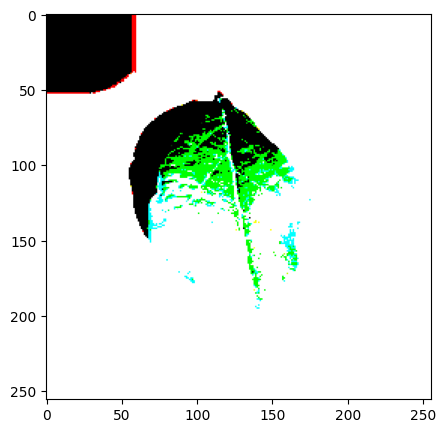

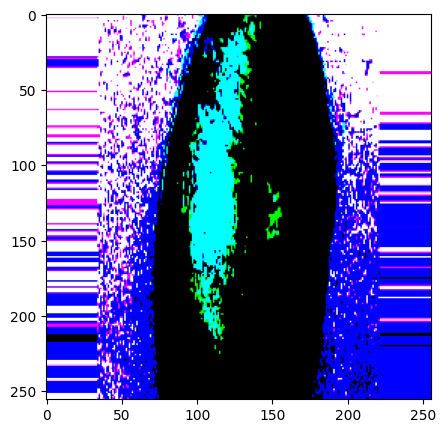

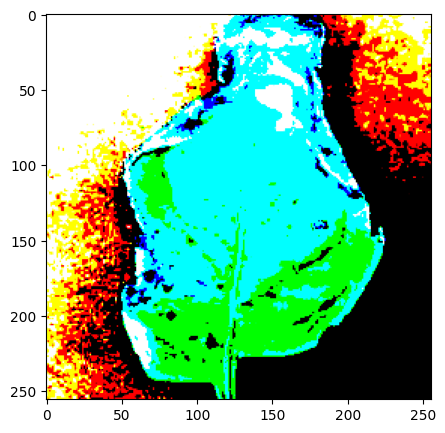

In [ ]:
plotImage(t_img[:3],label[:3])

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainble=False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

#create model
model=Model(base_model.input,X)

In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x793a3715da20>>

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#early stooping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

#model checkpoint
mc=ModelCheckpoint(filepath="best.model.h5",
                   monitor='val_accuracy',
                   min_delta=0.01,
                   patience=3,
                   verbose=1,
                   save_best_only=True)

cb=[es,mc]

In [ ]:
his= model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

<ipython-input-29-4be4f79a3cd2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his= model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 3.6349 - accuracy: 0.0449  
Epoch 1: val_accuracy improved from -inf to 0.02734, saving model to best.model.h5
16/16 [==============================] - 2068s 131s/step - loss: 3.6349 - accuracy: 0.0449 - val_loss: 3.6294 - val_accuracy: 0.0273
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 3.6381 - accuracy: 0.0117  
Epoch 2: val_accuracy did not improve from 0.02734
16/16 [==============================] - 1951s 124s/step - loss: 3.6381 - accuracy: 0.0117 - val_loss: 3.6231 - val_accuracy: 0.0273
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 3.6307 - accuracy: 0.0430  
Epoch 3: val_accuracy improved from 0.02734 to 0.03906, saving model to best.model.h5
16/16 [==============================] - 2006s 127s/step - loss: 3.6307 - accuracy: 0.0430 - val_loss: 3.6141 - val_accuracy: 0.0391
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 3.6285 - accuracy: 0.0156

In [ ]:
h=his.history
h.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

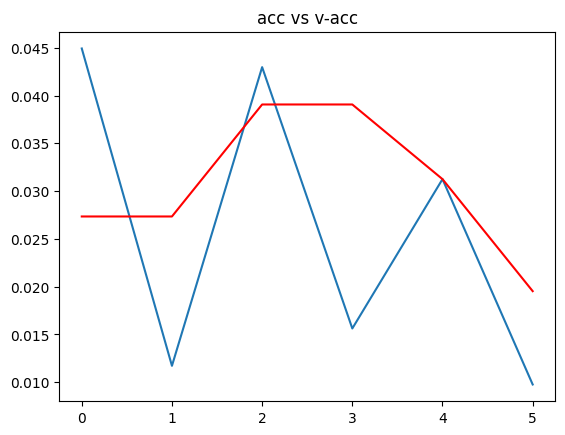

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

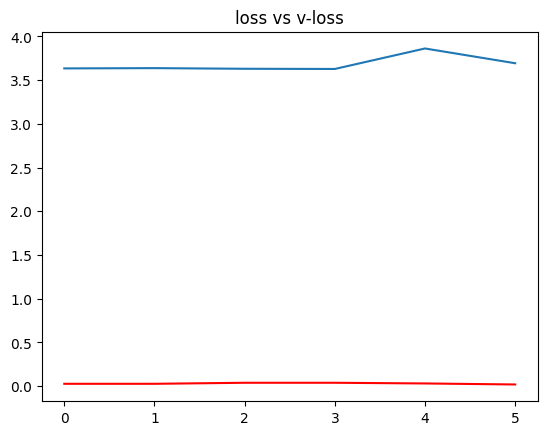

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_accuracy'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model

model=load_model("/content/best.model.h5")

In [ ]:
acc=model.evaluate_generator(val)[1]

print(f"The accuracy of your model is{acc*100}%")

NameError: ignored

In [ ]:
ref = dict(zip (list(train.class_indices.values),list(train.class_indices.keys()) ) )

In [ ]:
def prediction(path):
  img=load_img(path, target_size=(256,256))

  i=img_to_array(img)

  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f"the image belongs to{ref [pred] }")



In [ ]:
path="/content/test/test/AppleCedarRust4.JPG"
prediction(path)